# Exploratory Data Analysis

### Exploratory data analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them.

It is a good to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

So we will use the "World Happiness Report" as the dataset and perform Exploratory Data Analysis on it.

#### First, we will import all the python libraries that are required for this, which include NumPy for numerical calculations and scientific computing, Pandas for handling data and Matplotlib and Seaborn for visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = (12,6)
sns.set()

#### Read the data using pandas

In [2]:
happinessData = pd.read_csv("2015.csv")

#### Check the first few rows of the dataset

In [3]:
happinessData.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Using shape, we can observe that our dataset has 158 rows and 12 columns

In [4]:
happinessData.shape

(158, 12)

#### info() method shows some of the characteristics of the data such as, Column Name, No. of non-null values of our columns, Dtype of the data and Memory Usage. 

#### From this we can observe, that the data which we have doesn't have any missing values. We are very lucky in this case, but in real life scenarios, the data usually has missing values which we need to handle for our model to work accurately.

In [5]:
happinessData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

#### describe() method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25, 0.50, 0.75 quartiles.

In [6]:
happinessData.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


#### happinessData.corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

#### The resulting coefficient is a value between -1 and 1 inclusive, where:
###### 1: Total positive linear correlation.
###### 0: No linear correlation, the two variables most likely do not affect each other.
###### -1: Total negative linear correlation.
###### Pearson Correlation is the default method of the function "corr".
#### We create a heatmap using Seaborn to visualise the correlation.

<Axes: >

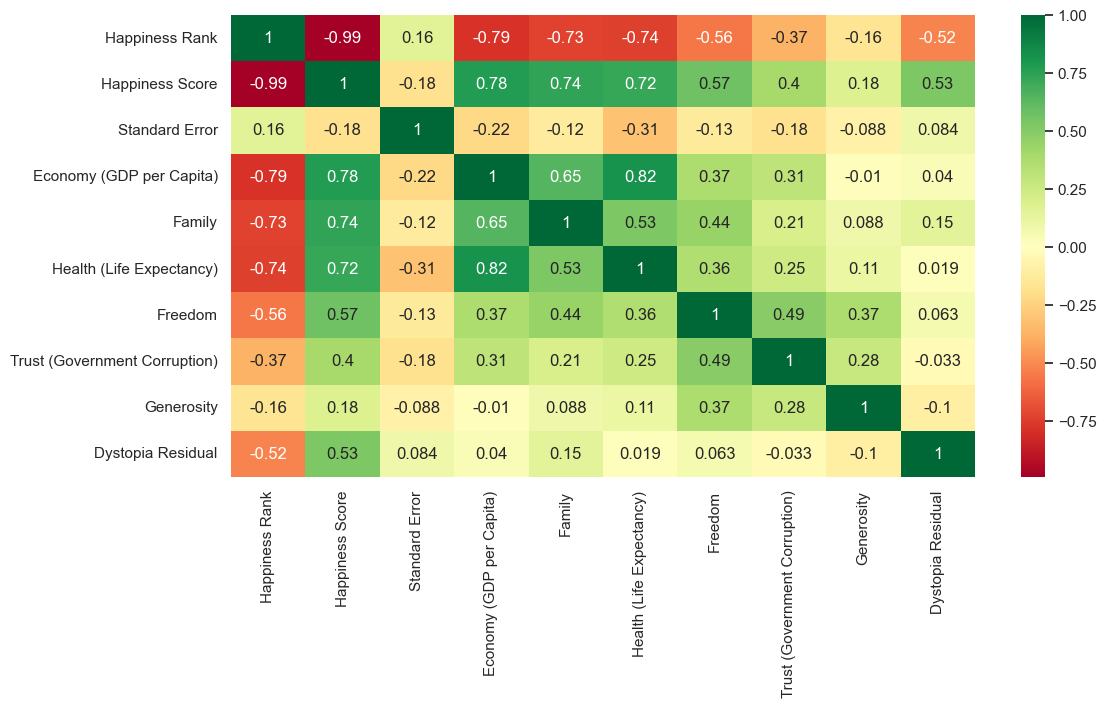

In [7]:
sns.heatmap(happinessData.corr(),annot=True,cmap='RdYlGn')

#### As we can observe from the above heatmap of correlations that, there is a high correlation between
##### Happiness Score - Economy (GDP per Capita) = 0.78
##### Happiness Score - Family = 0.74
##### Happiness Score - Health (Life Expectancy) = 0.72
##### Economy (GDP per Capita) - Health (Life Expectancy) = 0.82

#### Now,using Seaborn, we visualize the relation between Economy (GDP per Capita) and Happiness Score by using a regression plot. And as we can see that, as Economy increases, the Happiness Score increases as well denoting a positive relation.

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

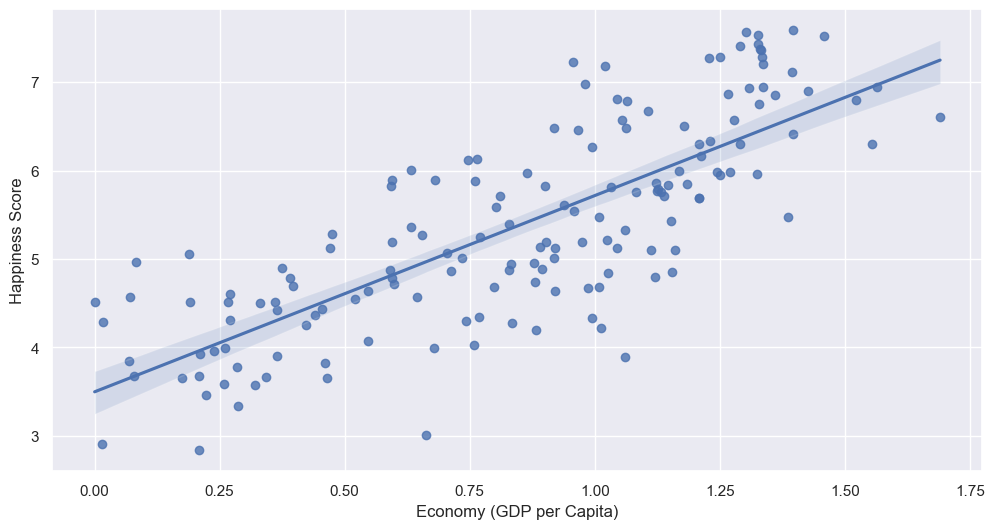

In [8]:
sns.regplot(x='Economy (GDP per Capita)',y='Happiness Score',data=happinessData)

#### Now,using Seaborn, we visualize the relation between Family and Happiness Score by using a regression plot.

<Axes: xlabel='Family', ylabel='Happiness Score'>

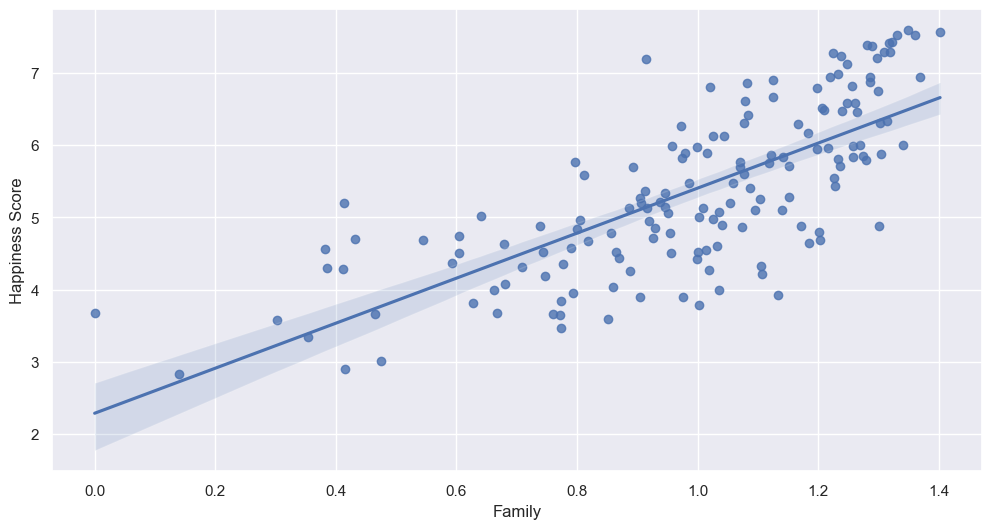

In [9]:
sns.regplot(x='Family',y='Happiness Score',data=happinessData)

#### Now,using Seaborn, we visualize the relation between Health (Life Expectancy) and Happiness Score by using a regression plot. And as we can see that, as Happiness is dependent on health,i.e. Good Health is equal to More Happiness.

<Axes: xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

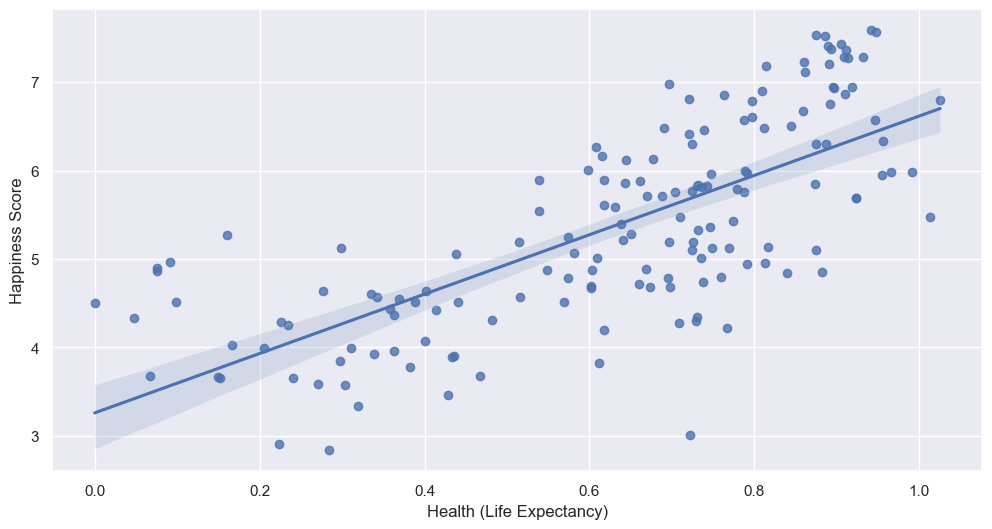

In [10]:
sns.regplot(x='Health (Life Expectancy)',y='Happiness Score',data=happinessData)

#### Now,using Seaborn, we visualize the relation between Freedom and Happiness Score by using a regression plot. And as we can see that, as the correlation is less between these two parameters so the graph is more scattered and the dependency is less between the two.

<Axes: xlabel='Freedom', ylabel='Happiness Score'>

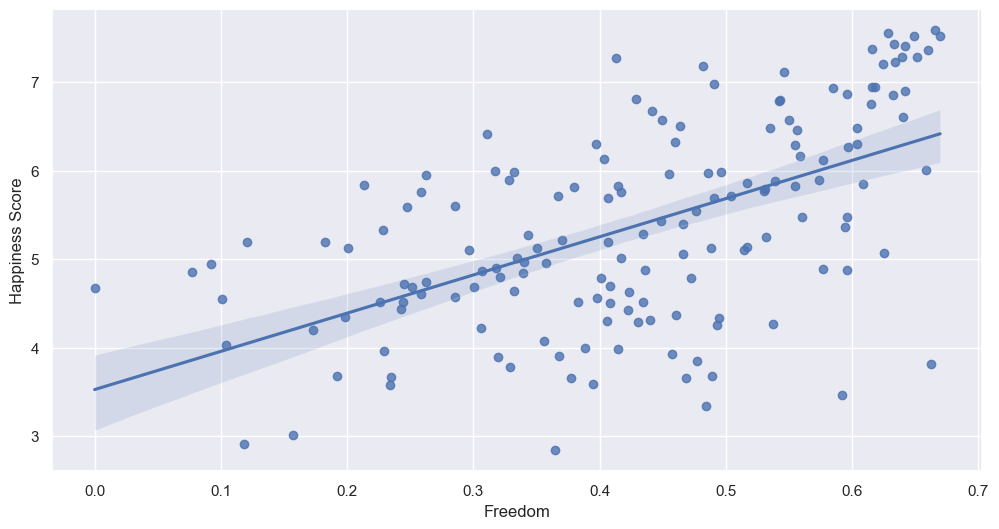

In [11]:
sns.regplot(x='Freedom',y='Happiness Score',data=happinessData)

#### Now,using Seaborn, we visualize the relation between Economy (GDP per Capita) and Health (Life Expectancy) by using a regression plot.

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Health (Life Expectancy)'>

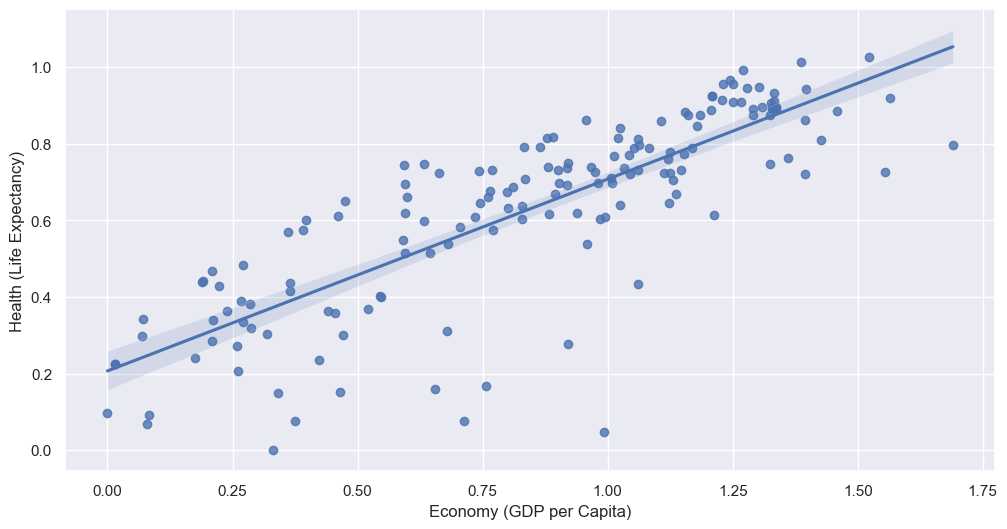

In [12]:
sns.regplot(x='Economy (GDP per Capita)',y='Health (Life Expectancy)',data=happinessData)

### The End